In [181]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Logistic Regression Classifier

## 1. Data

We create a toy data set with two classes using sklearn's make-blobs method.

X.shape = (100, 2) y.shape = (100,)


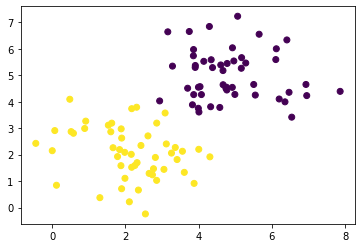

In [182]:
centers = np.array([[5, 5],[2, 2]])
X, y = make_blobs(n_samples=100, n_features=2, centers=centers, cluster_std=1.0)
plt.scatter(X[:,0], X[:,1], c=y)
print(f"X.shape = {X.shape} y.shape = {y.shape}")

## 2. Classifier

Recall, in Logistic Regression the prediction $h(\mathbf{x}_i)$ of the classifier is given as

$$
\hat{y}_i = h(\mathbf{x}_i) = p(y = 1 | \mathbf{x}) = \sigma(\mathbf{w}^T \mathbf{x}_i)
$$

The activation function $\sigma(x)$ is given as $\sigma(a) = \frac{1}{1 + e^{-a}}$.

The vector $\mathbf{w}$ denotes the parameter vector $\mathbf{w} = (w_0, w_1, \ldots, w_p)^T$ and $\mathbf{x}_i = (1, x_{i,1}, x_{i,2}, \ldots, x_{i,p})$ the $i$-th data point.

Implement the Logistic Regression classifier. To find the parameters $\mathbf{w}$, use stochastic gradient ascent for maximizing the Log-Likelihood.

The gradient of the log-likelihood $\mathcal{L}(\mathbf{w})$ is given as:

$$
\nabla_\mathbf{w}\mathcal{L}(\mathbf{w}) = \sum_{i=1}^n (y_i - \sigma(\mathbf{w}^T \mathbf{x}_i)) \mathbf{x}_i
$$

## 2. Activation function

Implement the activation function $\sigma$.

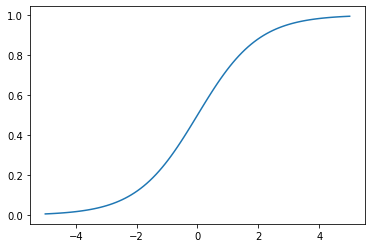

In [183]:
from math import e

def sigma(x):
    return 1./(1+e**-x)

x = np.linspace(-5, 5, num=100)
plt.plot(x, sigma(x))

## 3. Calculate the output of the Logistic Regression Classifier

Implement the ```predict``` method of the LogReg classifier to calculate the output of the model as

$$ \hat{y}_i = h(\mathbf{x}_i) = \sigma(\mathbf{w}^T \mathbf{x}_i)$$


## 4. Update parameters

Implement stochastic gradient ascent for maximizing the Likelihood function in the ```fit``` method below. 
- ```eta``` is the learning rate.
- ```n_epochs``` determines how often we cycle through the entire dataset and update the weights.

REPEAT for all data points and a number of epochs ```n_epochs```: 
1. Calculate the output of the Logistic Regression Classifier $h(\mathbf{x})$
2. Calculate the gradient for a single training data point $\nabla_{\mathbf{w}}\mathcal{L}(\mathbf{x}_i) = (y_i - \sigma(\mathbf{w}^T \mathbf{x}_i)) \cdot \mathbf{x}_i$
3. Apply the update rule of gradient ascent: $\mathbf{w} = \mathbf{w} + \eta \nabla_{\mathbf{w}}\mathcal{L}(\mathbf{x}_i)$

In [184]:
class LogisticRegression(object):
    def __init__(self):
        pass
    
    def heaviside(self, a):
        if a > 0: return 1
        else: return 0
    
    def fit(self, X, y, n_epochs=100, eta=0.1):
        
        n, d_m1 = X.shape
        
        # Add constant 1 to X
        Xn = np.concatenate([np.ones((n, 1)), X], axis=1)
        
        # Create parameter vector w initialized with all zeros
        self.w = np.zeros((d_m1 + 1,))
        
        for e in range(n_epochs):
            LogLikeliHood = 0
            for i in range(n):
                y_hat = sigma(np.dot(Xn[i], self.w))
                error = np.multiply(y[i]-y_hat, Xn[i])
                self.w += eta*error
                LogLikeliHood += y[i] * np.log(y_hat) + (1-y[i]) * np.log(1 - y_hat)
        print(LogLikeliHood)
        
    def predict(self, X):
        
        n = len(X)
        
        # Store predictions
        y_hat = np.zeros(n)
        
        # Add column of constant 1 to X
        constantCol = np.ones((n,1))
        Xn = np.concatenate((constantCol, X), axis=1)
        
        for i, row in enumerate(Xn):
            y_hat[i] = sigma(np.dot(row,self.w))
        return y_hat
    
clf = LogisticRegression()
clf.fit(X, y)
y_hat = clf.predict(X)

-4.333764936295721


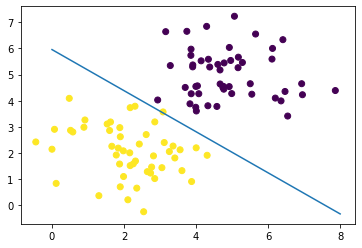

In [197]:
x0 = clf.w[0]
x1 = clf.w[1]
x2 = clf.w[2]

plt.scatter(X[:,0], X[:,1], c=y)
plt.plot([0, 8], [-x0/x2, (-x1/x2)*8-x0/x2])
plt.show()